In [37]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from adjustText import adjust_text

K-means using sklearn

In [38]:
# 1. Fetch data from OpenWeatherMap API
API_KEY = '54248532ff82c2114d1f61f8c1632333'
cities = [
   'London', 'New York', 'Paris', 'Tokyo', 'Mumbai', 'Beijing', 'Berlin', 
   'Sydney', 'Cairo', 'Rio de Janeiro', 'Moscow', 'Cape Town', 'Toronto', 
   'Buenos Aires', 'Bangkok', 'Dubai', 'Singapore', 'Seoul', 'Los Angeles', 
   'Mexico City'
]
weather_data = []

for city in cities:
   url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
   response = requests.get(url)
   if response.status_code == 200:
      data = response.json()
      weather_data.append({
         'city': city,
         'temperature': data['main']['temp'],
         'humidity': data['main']['humidity']
      })

In [39]:
# 2. Convert to DataFrame
df = pd.DataFrame(weather_data)

df

,city,temperature,humidity
0,London,5.60,89
1,New York,-11.33,60
2,Paris,0.45,100
3,Tokyo,8.77,67
4,Mumbai,27.99,44
5,Beijing,0.94,26
6,Berlin,0.14,89
7,Sydney,21.01,79
8,Cairo,23.42,20
9,Rio de Janeiro,28.98,84


In [40]:
# 3. Perform K-Means Clustering
X = df[['temperature', 'humidity']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

c:\Users\lfenelon\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


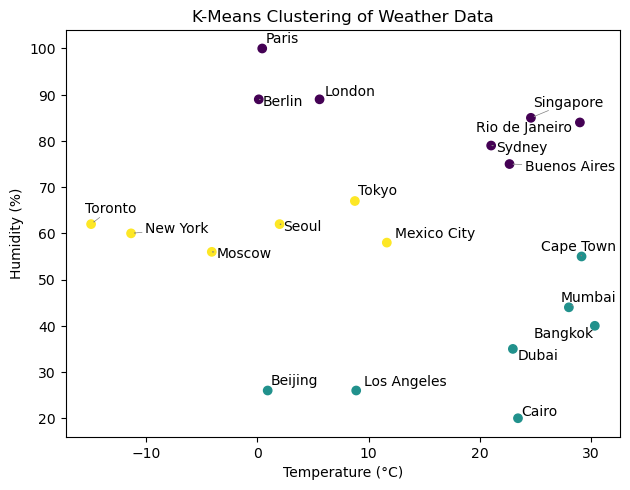

In [41]:
# 4. Visualize the Clusters
plt.scatter(df['temperature'], df['humidity'], c=df['cluster'], cmap='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

texts = []
for i, row in df.iterrows():
    texts.append(plt.text(row['temperature'], row['humidity'], row['city'], fontsize=10))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))

plt.tight_layout()
plt.title('K-Means Clustering of Weather Data')
plt.show()

In [42]:
# Print the results
print(df)

              city  temperature  humidity  cluster
0           London         5.60        89        0
1         New York       -11.33        60        2
2            Paris         0.45       100        0
3            Tokyo         8.77        67        2
4           Mumbai        27.99        44        1
5          Beijing         0.94        26        1
6           Berlin         0.14        89        0
7           Sydney        21.01        79        0
8            Cairo        23.42        20        1
9   Rio de Janeiro        28.98        84        0
10          Moscow        -4.08        56        2
11       Cape Town        29.13        55        1
12         Toronto       -14.92        62        2
13    Buenos Aires        22.66        75        0
14         Bangkok        30.32        40        1
15           Dubai        22.96        35        1
16       Singapore        24.58        85        0
17           Seoul         2.01        62        2
18     Los Angeles         8.89

K-means from scratch